In [7]:
import os, shutil
original_data_dir = 'C:\\Users\\bikas\\Documents\\Datasets\\BanglaLekha-Isolated\\Images'
train_dir = 'C:\\Users\\bikas\\Documents\\Datasets\\BanglaLekha-Isolated\\train'
test_dir = 'C:\\Users\\bikas\\Documents\\Datasets\\BanglaLekha-Isolated\\test'

In [ ]:
os.mkdir(test_dir)
os.mkdir(train_dir)

In [ ]:
from os import listdir
from os.path import isfile, join

for i in range(1, 85):
    src_path = os.path.join(original_data_dir, str(i))
    train_path = os.path.join(train_dir, str(i))
    test_path = os.path.join(test_dir, str(i))
    os.mkdir(train_path)
    os.mkdir(test_path)
    
    onlyfiles = [f for f in listdir(src_path) if isfile(join(src_path, f))]
    for j in range(1600):
        src = os.path.join(src_path, onlyfiles[j])
        dst = os.path.join(train_path, onlyfiles[j])
        shutil.copyfile(src, dst)
    
    for j in range(1600, len(onlyfiles)):
        src = os.path.join(src_path, onlyfiles[j])
        dst = os.path.join(test_path, onlyfiles[j])
        shutil.copyfile(src, dst)


In [8]:
from keras import models, layers, losses, optimizers, metrics
from keras.preprocessing.image import ImageDataGenerator

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150), 
    batch_size=32
)

test_generator = test_generator.flow_from_directory(
    test_dir, 
    target_size=(150, 150), 
    batch_size=32
)

Found 134400 images belonging to 84 classes.
Found 31705 images belonging to 84 classes.


In [11]:
for data_batch, label_batch in train_generator:
    print(data_batch.shape)
    print(label_batch.shape)
    break

(32, 150, 150, 3)
(32, 84)


In [12]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(84, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [ ]:
# load model if saved
from keras.models import load_model
model = load_model('simple_convnet.h5')

model.summary()

In [13]:
# Compile the model
model.compile(
    optimizer=optimizers.RMSprop(lr=1e-4), 
    loss=losses.categorical_crossentropy, 
    metrics=[metrics.categorical_accuracy]
)

In [ ]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch=4200, 
                              epochs=30, 
                              validation_data=test_generator, 
                              validation_steps=900)

In [15]:
model.save('simple_convnet.h5')

# Observation

The model had reached accuracy of about 85% and start overfitting just after 5 epoch. Let's try to have some solution to this overfittng problem. I think the image augmentation technique should not be used for character recognition task. So let's start with dropout

# Handling overfitting: Adding dropout

In [16]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(84, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [17]:
# Compile the model
model.compile(
    optimizer=optimizers.RMSprop(lr=1e-4), 
    loss=losses.categorical_crossentropy, 
    metrics=[metrics.categorical_accuracy]
)

In [18]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch=4200, 
                              epochs=20, 
                              validation_data=test_generator, 
                              validation_steps=900)

Epoch 1/20
4200/4200 [==============================] - 260s - loss: 1.5605 - categorical_accuracy: 0.6030 - val_loss: 0.9392 - val_categorical_accuracy: 0.7542
Epoch 2/20
4200/4200 [==============================] - 256s - loss: 0.8059 - categorical_accuracy: 0.7864 - val_loss: 0.6859 - val_categorical_accuracy: 0.8192
Epoch 3/20
4200/4200 [==============================] - 257s - loss: 0.6212 - categorical_accuracy: 0.8345 - val_loss: 0.5993 - val_categorical_accuracy: 0.8391
Epoch 4/20
4200/4200 [==============================] - 256s - loss: 0.5332 - categorical_accuracy: 0.8576 - val_loss: 0.5315 - val_categorical_accuracy: 0.8570
Epoch 5/20
4200/4200 [==============================] - 255s - loss: 0.4807 - categorical_accuracy: 0.8703 - val_loss: 0.5110 - val_categorical_accuracy: 0.8633
Epoch 6/20
4200/4200 [==============================] - 253s - loss: 0.4500 - categorical_accuracy: 0.8782 - val_loss: 0.4990 - val_categorical_accuracy: 0.8694
Epoch 7/20
4200/4200 [============

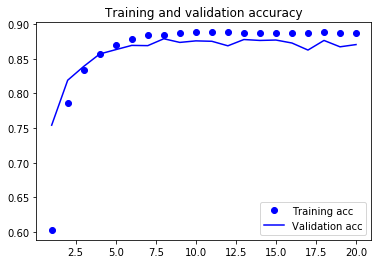

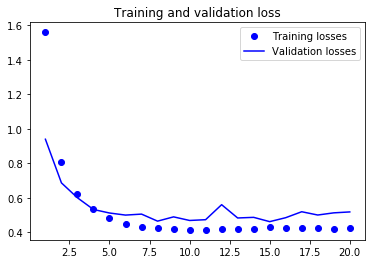

In [20]:
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training losses')
plt.plot(epochs, val_loss, 'b', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Observation

Looks like the the accuracy with one dropout has taken the accuracy close to 88% which is a 3% increase. Let's try to improve it with a little augmentation

In [21]:
model.save('dropout_model.h5')

# Applying image augmentation

In [22]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=15, 
                                   width_shift_range=0.05, 
                                   height_shift_range=0.05, 
                                   shear_range=0.05,
                                   zoom_range=0.1, 
                                   horizontal_flip=False)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150), 
    batch_size=32
)

test_generator = test_datagen.flow_from_directory(
    test_dir, 
    target_size=(150, 150), 
    batch_size=32
)

Found 134400 images belonging to 84 classes.
Found 31705 images belonging to 84 classes.


In [23]:
model.compile(
    optimizer=optimizers.RMSprop(lr=1e-4), 
    loss=losses.categorical_crossentropy, 
    metrics=[metrics.categorical_accuracy]
)

In [24]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch=4200, 
                              epochs=30, 
                              validation_data=test_generator, 
                              validation_steps=900)

Epoch 1/30
 120/4200 [..............................] - ETA: 488s - loss: 0.7601 - categorical_accuracy: 0.7943

KeyboardInterrupt: 